*The University of Cape Verde - Faculty of Science and Technologies - Artificial Intelligence for Development (AI4D)*

# Analysis of pests and plagues in Cape Verde

In this notebook we analyse the (TODO: finish the explainment)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
metadata = pd.read_csv('../data/pestes e pragas - cabo verde.csv')
metadata.drop('Imagem', axis=1, inplace=True)
metadata.drop([8, 13, 14, 29], axis=0, inplace=True) # Duplicated lines
metadata.head()

,Nome científico,Nome popular,Descrição,Culturas atacadas,Proposta de Controlo
0,phytophthora infestans,Míldio Do Tomate,Nas folhas e no caule são observadas manchas (...,"tomate, batata-comum, beringela, solanáceas","Tratamento Com Euparene (20g / 10l Água), Manc..."
1,alternaria solani,Pinta Preta Do Tomate,Folhas com manchas (cinzento-acastanhadas a es...,tomate,"Tratamento Preventivo No Viveiro, Dois Tratame..."
2,tobacco mosaic virus,Mosaico Comum Do Tomate,"Nas folhas aparecem manchas (amarelas, verde c...",tomate,"Eliminação Das Plantas Infectadas, Por Em Repo..."
3,maize streak virus,Mosaico Estriado Do Milho,As folhas apresentam manchas amarelas alongadas,milho,"Eliminação De Ervas Daninhas Monocotiledónias,..."
4,sclerophthora macrospora,Míldio Do Milho,Listras contínuas pálidas sobre as folhas\nInf...,milho,Eliminação De Plantas Infectadas


In [62]:
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas']]

,Nome popular,Nome científico,Culturas atacadas
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas"
1,Pinta Preta Do Tomate,alternaria solani,tomate
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate
3,Mosaico Estriado Do Milho,maize streak virus,milho
4,Míldio Do Milho,sclerophthora macrospora,milho
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor"
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate"
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos..."
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe..."


### Analysing the data by the rate of interest of each culture
The rate of interest is defined by weight of each different culture on our country

In [63]:
RATE_OF_INTEREST = {
    'tomate': 9,
    'milho': 7,
    'mandioca': 5,
    'abóbora': 4,
    'diversos': 4,
    'cana-de-açúcar': 2,
    'bananeira': 2,
    'batata-comum': 2
}

DEFAULT_INTEREST = 1

In [64]:
def interest_rate(culture: str) -> int:
    return RATE_OF_INTEREST[culture] if culture in RATE_OF_INTEREST else DEFAULT_INTEREST

In [65]:
cultures_list = [[c.strip().replace('\n', ' ') for c in cults.split(',')] for cults in list(metadata['Culturas atacadas'])]

rate_of_interests = [sum(interest_rate(culture) for culture in cultures) for cultures in cultures_list]

In [66]:
metadata['Grau de Interesse'] = rate_of_interests

Pests and plagues and they rate of interest in the Cape Verdean Culture

In [67]:
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse']]

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13
1,Pinta Preta Do Tomate,alternaria solani,tomate,9
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate,9
3,Mosaico Estriado Do Milho,maize streak virus,milho,7
4,Míldio Do Milho,sclerophthora macrospora,milho,7
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca,5
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor",3
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate",12
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16


Now sorted by the most interesting ones

In [68]:
interesting_species = metadata[
    ['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse']
].sort_values('Grau de Interesse', ascending=False)

interesting_species.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",27
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",25
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",21
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13
35,Ácaro Vermelho,tetranychus cinnabarinus,"mandioca, papaieira, abóbora, abobrinha, moran...",13
26,Falsa Medidora,chrysodeixis chalcites,"tomate, pimento, couve, repolho, alface",13
22,Lagarta Do Tomate,tuta absoluta,"solanáceas, tomate, beringela, batata, pimentão",13


In [76]:
def plot_bar(X, Y):
    assert len(X) == len(Y), 'They should be equal'
    fig, ax = plt.subplots()

    ax.bar(X, Y)

    plt.xticks(rotation='vertical')
    plt.show()

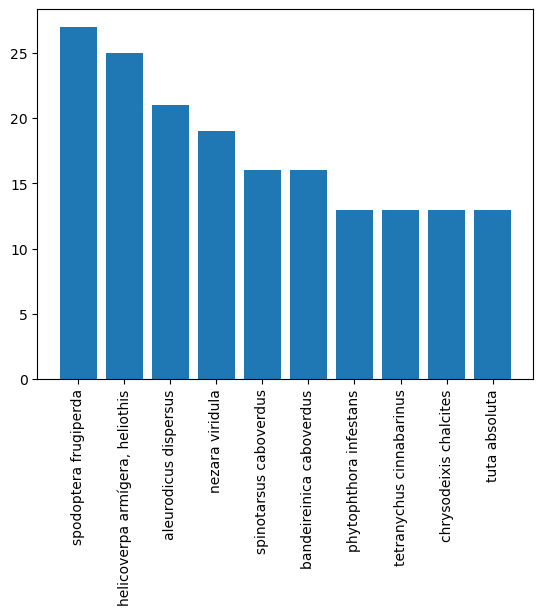

In [77]:
data = interesting_species.head(10)

scientific_names = list(data['Nome científico'])
interest_rates = list(data['Grau de Interesse'])

plot_bar(scientific_names, interest_rates)

In [70]:
cultures_per_plagues = [sum(1 if c != 'diversos' else 5 for c in cultures) for cultures in cultures_list]

In [71]:
metadata['Culturas por Pragas'] = cultures_per_plagues
metadata[['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse', 'Culturas por Pragas']]

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas
0,Míldio Do Tomate,phytophthora infestans,"tomate, batata-comum, beringela, solanáceas",13,4
1,Pinta Preta Do Tomate,alternaria solani,tomate,9,1
2,Mosaico Comum Do Tomate,tobacco mosaic virus,tomate,9,1
3,Mosaico Estriado Do Milho,maize streak virus,milho,7,1
4,Míldio Do Milho,sclerophthora macrospora,milho,7,1
5,Mosaico Comum Da Mandioca,vírus do mosaico africano da mandioca,mandioca,5,1
6,Traça-Da-Couve,plutella xylostella,"couve, repolho, couve-flor",3,3
7,Lagarta-Medidora-Do-Repolho,trichoplusia ni,"couve, repolho, couve-flor, tomate",12,4
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5
10,Milpés,spinotarsus caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16,5


In [72]:
ranked_by_cultures_per_plagues = metadata[
    ['Nome popular', 'Nome científico', 'Culturas atacadas', 'Grau de Interesse', 'Culturas por Pragas']
].sort_values('Culturas por Pragas', ascending=False)

ranked_by_cultures_per_plagues.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",21,15
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",27,14
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",25,10
35,Ácaro Vermelho,tetranychus cinnabarinus,"mandioca, papaieira, abóbora, abobrinha, moran...",13,6
30,Mosca De Abóbora,dacus frontalis,"abobora, abobrinha, melão, melancia, pimento, ...",6,6
22,Lagarta Do Tomate,tuta absoluta,"solanáceas, tomate, beringela, batata, pimentão",13,5
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19,5
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16,5
31,Mosquinha Branca,bemisia tabaci,diversos,4,5
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5


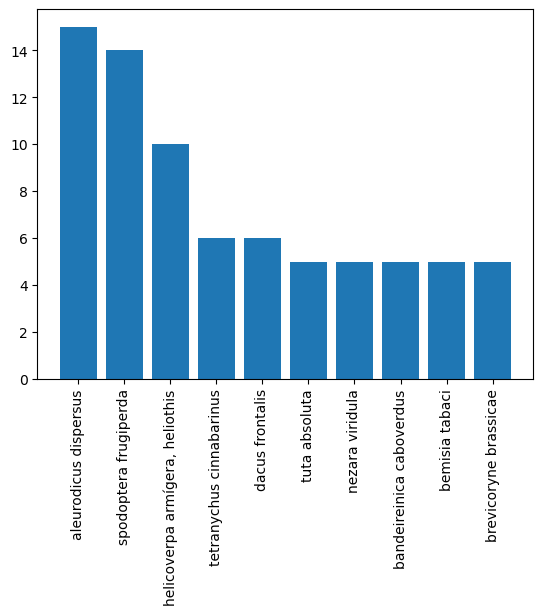

In [78]:
data = ranked_by_cultures_per_plagues.head(10).copy()

scientific_names = list(data['Nome científico'])
cults_per_plagues = list(data['Culturas por Pragas'])

plot_bar(scientific_names, cults_per_plagues)

In [74]:
squared_sum_interest_rate = [(i ** 2 + n ** 2)**0.5 for (i, n) in list(zip(interest_rates, cults_per_plagues))]
squared_sum_interest_rate

[30.886890422961002,
 28.653097563788805,
 23.259406699226016,
 19.924858845171276,
 17.08800749063506,
 16.76305461424021,
 13.92838827718412,
 13.92838827718412,
 13.92838827718412,
 13.92838827718412]

In [84]:
data = ranked_by_cultures_per_plagues.head(10).copy()
data['Soma quadrada de interesses'] = squared_sum_interest_rate

In [86]:
data.sort_values('Soma quadrada de interesses', ascending=False)
data.head(10)

,Nome popular,Nome científico,Culturas atacadas,Grau de Interesse,Culturas por Pragas,Soma quadrada de interesses
15,Mosca Branca,aleurodicus dispersus,"bananeira, caju, abacateiro, citrinos, goiaba,...",21,15,30.886890
20,Lagarta De Cartucho Do Milho,spodoptera frugiperda,"cana-de-açúcar, mancarra, citrinos, videira cu...",27,14,28.653098
21,Lagarta Do Tomate,"helicoverpa armígera, heliothis","tomate, couve, couveflor, repolho, mancarra, a...",25,10,23.259407
35,Ácaro Vermelho,tetranychus cinnabarinus,"mandioca, papaieira, abóbora, abobrinha, moran...",13,6,19.924859
30,Mosca De Abóbora,dacus frontalis,"abobora, abobrinha, melão, melancia, pimento, ...",6,6,17.088007
22,Lagarta Do Tomate,tuta absoluta,"solanáceas, tomate, beringela, batata, pimentão",13,5,16.763055
19,Tartaruginha,nezara viridula,"fruteiras, milho, feijão, batata, tomate",19,5,13.928388
37,Mil-Pés De Santo Antão,bandeireinica caboverdus,"batata-comum, batata-doce, mandioca, milho, fe...",16,5,13.928388
31,Mosquinha Branca,bemisia tabaci,diversos,4,5,13.928388
9,Piolho-Farinhento-Da-Couve,brevicoryne brassicae,"couve, couve-flor, repolho, agrião, nabo e mos...",5,5,13.928388


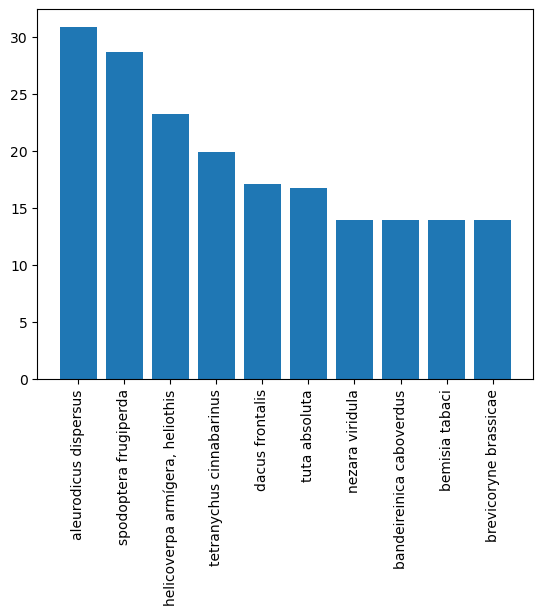

In [87]:
plot_bar(list(data['Nome científico']), list(data['Soma quadrada de interesses']))